<font size=5 > <p style="color:purple"> Research Problem: Predicting Medical Insurance Charges Based on Demographic and Health Factors


<font size='3'>
The primary objective of this educational research (for my end of term summative ) is to develop a model that predicts an individual’s medical insurance charges based on demographic and health-related factors, including age, gender, BMI, number of children, smoking status, and residential region. Understanding how these factors impact insurance premiums can help both insurance companies and consumers make more informed decisions. The model to be deployed aims to improve the accuracy of insurance pricing and potentially offer personalized insurance plans that reflect individual health risks more accurately.

* **age:** The age of the primary beneficiary. This factor likely correlates with insurance premiums, as older individuals tend to have higher healthcare needs. The relationship between age and insurance charges is expected to be positive — as age increases, so do medical charges due to age-related health risks.

* **sex:** The gender of the insurance contractor (male or female). Gender might affect the pricing due to different health risks and medical costs typically associated with each gender. For example, women may have higher premiums due to reproductive health considerations.

* **bmi:** Body Mass Index (calculated as weight (kg) / height² (m²)) is an objective indicator of body weight relative to height. A higher BMI typically suggests higher health risks, such as heart disease, diabetes, and hypertension. For insurance purposes, individuals with BMI values outside the ideal range (18.5-24.9) could face higher premiums.

* **children:** Number of children covered by the health insurance (or number of dependents). This variable helps insurers estimate the size of the policyholder’s family and may impact the overall cost of the insurance plan. More children usually imply higher premiums due to family coverage

* **smoker:** A categorical variable that indicates whether the individual smokes. Smoking is a well-known risk factor for a range of health issues, including lung cancer, heart disease, and respiratory problems. Smokers are expected to have significantly higher insurance charges due to the increased health risks associated with smoking.

* **region:** The residential area of the beneficiary in the United States, divided into four regions: Northeast, Southeast, Southwest, and Northwest. Healthcare costs can vary by region due to differences in medical infrastructure, cost of living, and regional healthcare policies. This factor could influence insurance premiums, with some regions experiencing higher medical costs than others due to local economic factors and healthcare availability

My student mission : Healthcare - I hope to make healthcare accessible and affordable for all .

Data source : Kaggle
Link : https://www.kaggle.com/code/mariapushkareva/medical-insurance-cost-with-linear-regression/input

<font size=5><p style="color:purple"> Data Exploration and Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('/content/data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [6]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


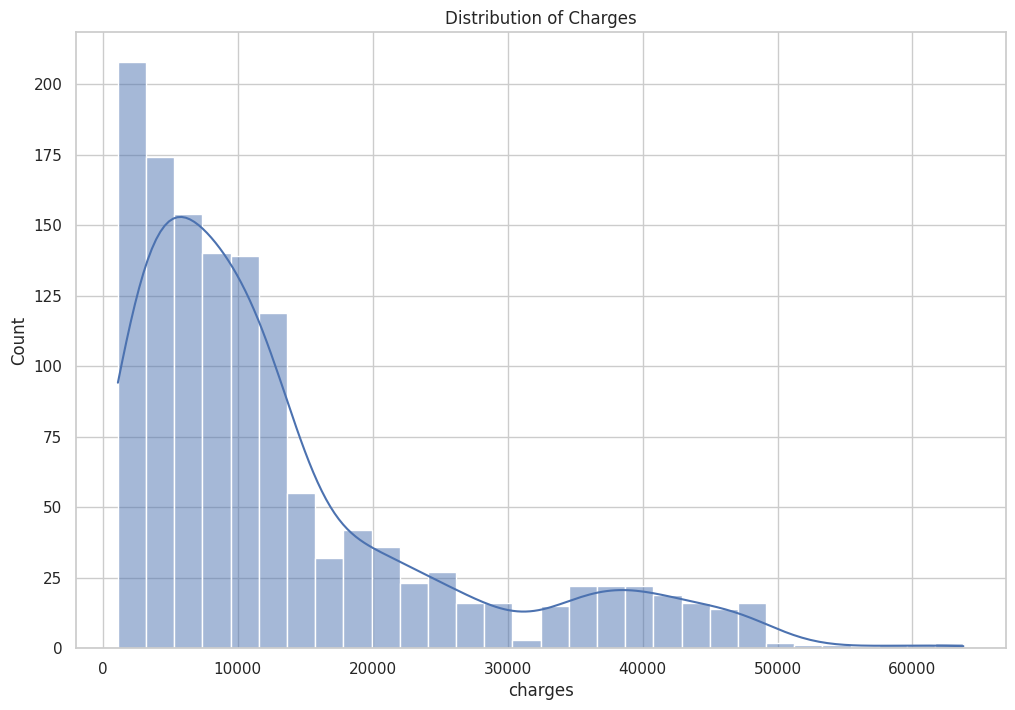

In [7]:

sns.set(style='whitegrid')
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.histplot(df['charges'], kde=True, color='b')
plt.title('Distribution of Charges')
plt.show()


<font size='2' font>This distribution is right-skewed. To make it closer to normal, l am going to apply natural log

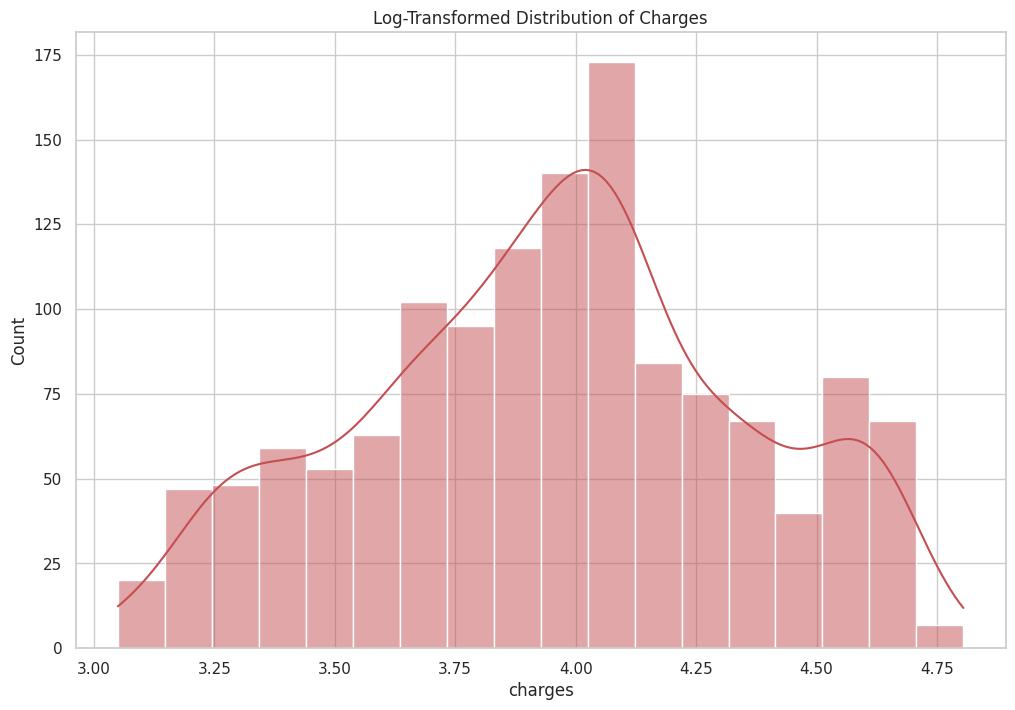

In [8]:
# Applying log10 transformation to 'charges'
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.histplot(np.log10(df['charges']), kde=True, color='r')
plt.title('Log-Transformed Distribution of Charges')
plt.show()

<font size=2> Exploring charges by region


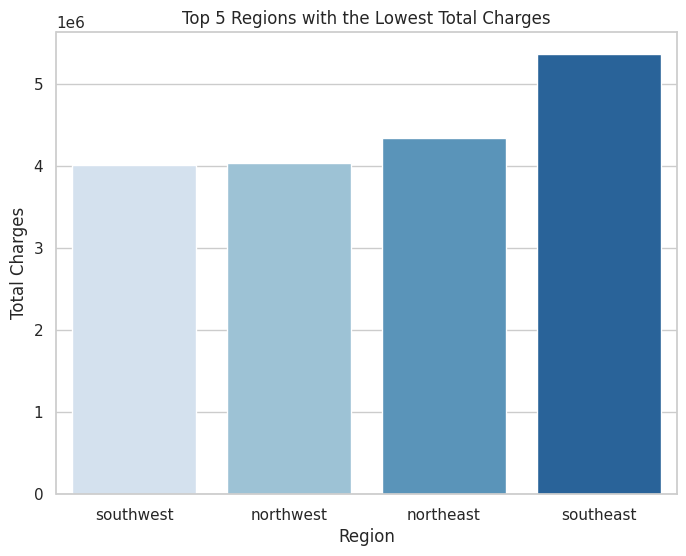

In [9]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending=True)

f, ax = plt.subplots(1, 1, figsize=(8, 6))

ax = sns.barplot(x=charges.head().index, y=charges.head(), palette='Blues')

plt.title('Top 5 Regions with the Lowest Total Charges')
plt.xlabel('Region')
plt.ylabel('Total Charges')
plt.show()


<font size='2' font>Medical charges are highest in the Southeast and lowest in the Southwest.

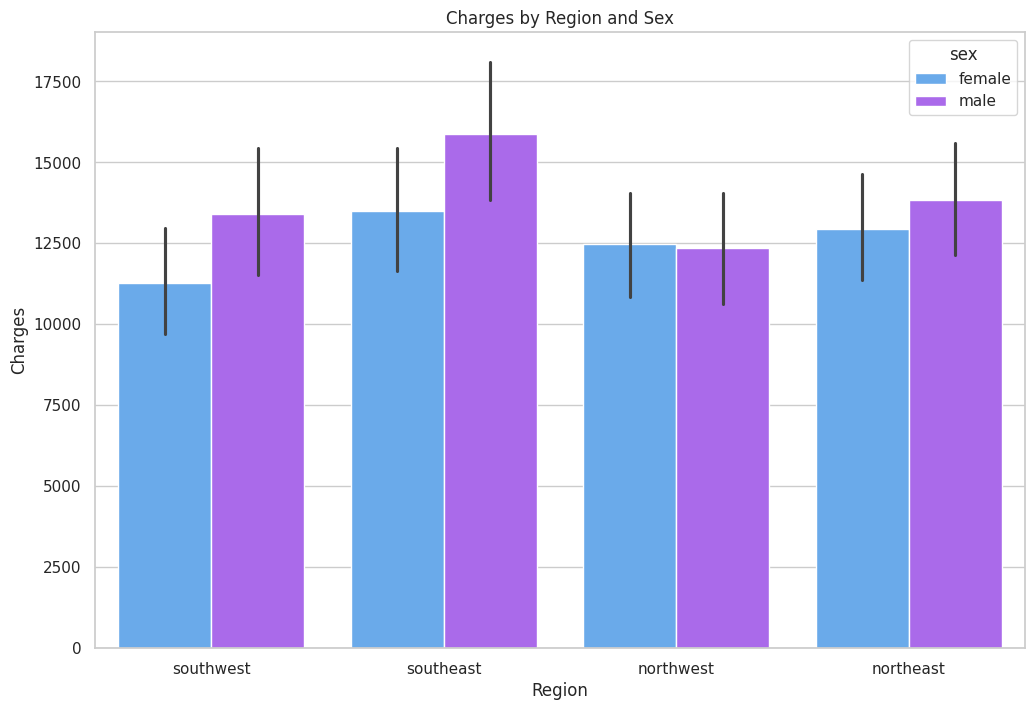

In [10]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

plt.title('Charges by Region and Sex')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()


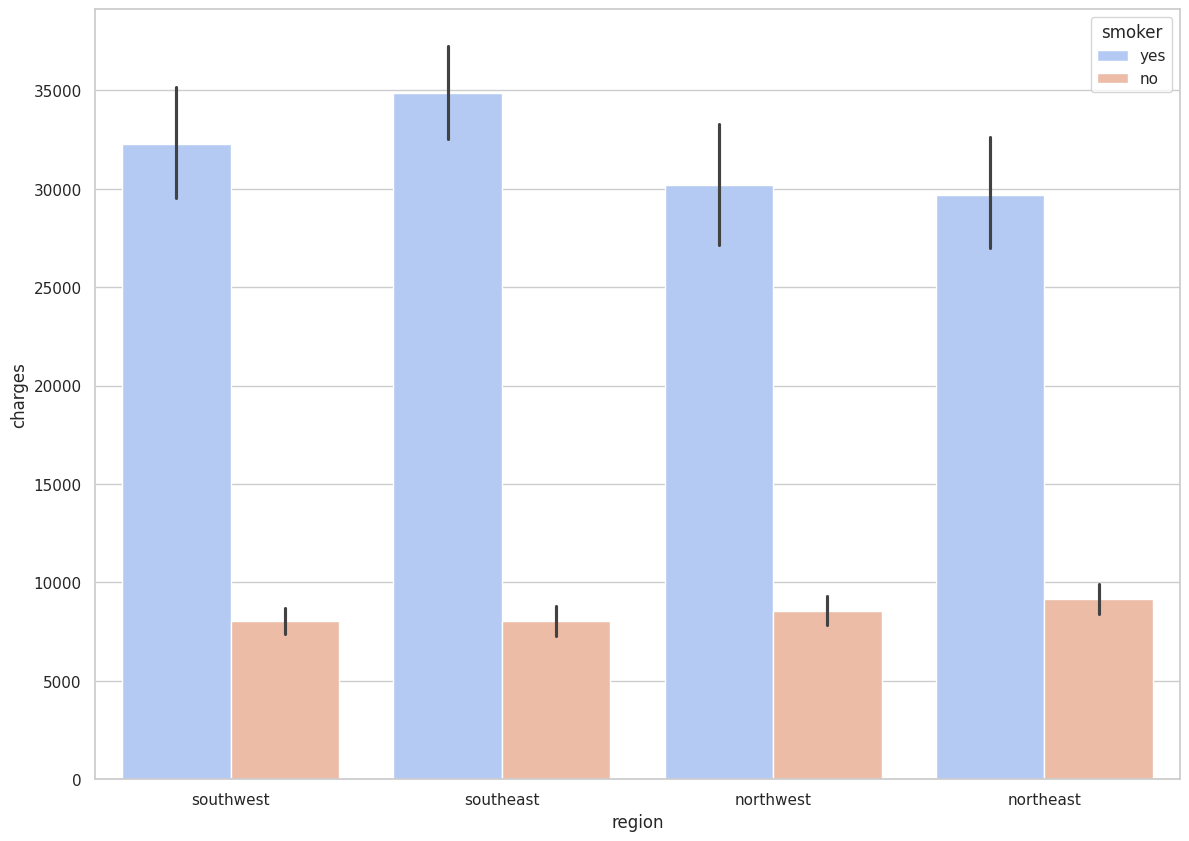

In [11]:
fig, axis = plt.subplots(figsize=(14, 10))
axis = sns.barplot(x='region', y='charges', hue='smoker', data=df, palette='coolwarm')  # Change color palette


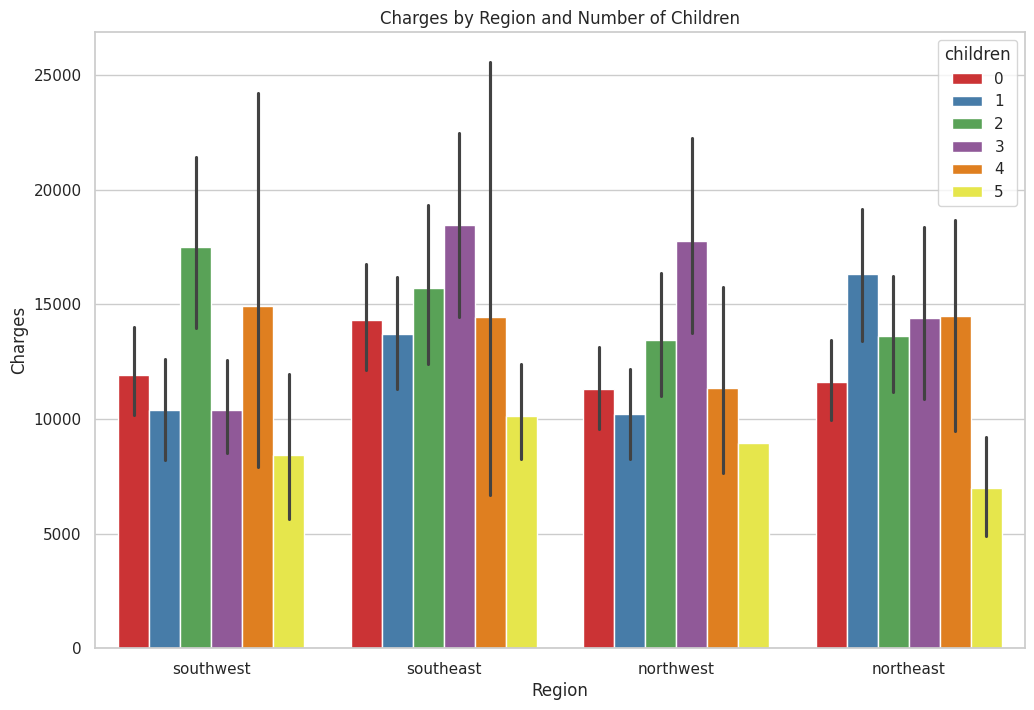

In [12]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')

plt.title('Charges by Region and Number of Children')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()


<font size='2' font>Important points to note
-Highest smoking-related charges are in the Southeast; lowest in the Northeast.
-Southwest has more smokers than the Northeast, but Northeast charges are higher by gender.
Having children increases medical costs overall.

<font size='2' font>Next step :  analyzing  the medical charges by age, bmi and children according to the smoking factor

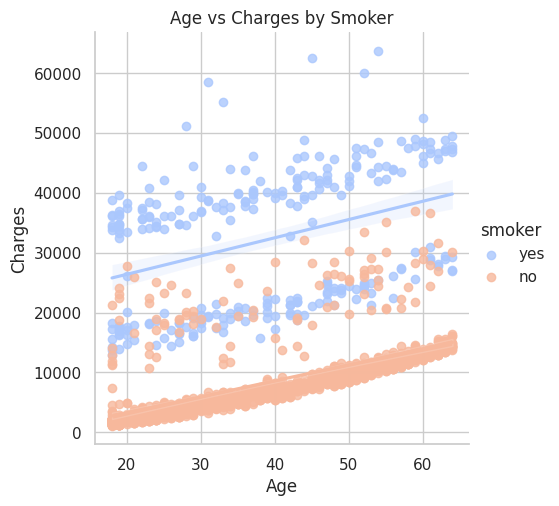

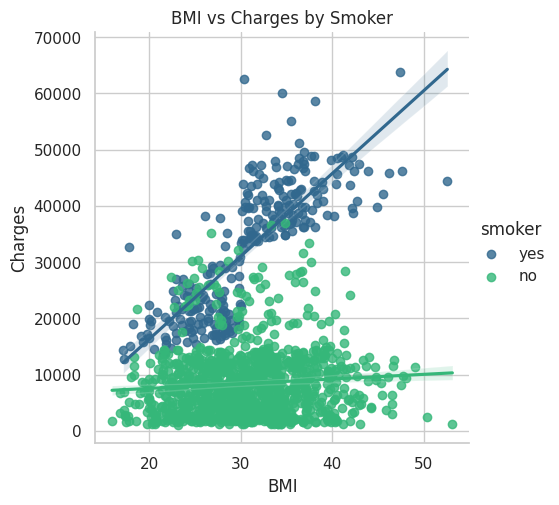

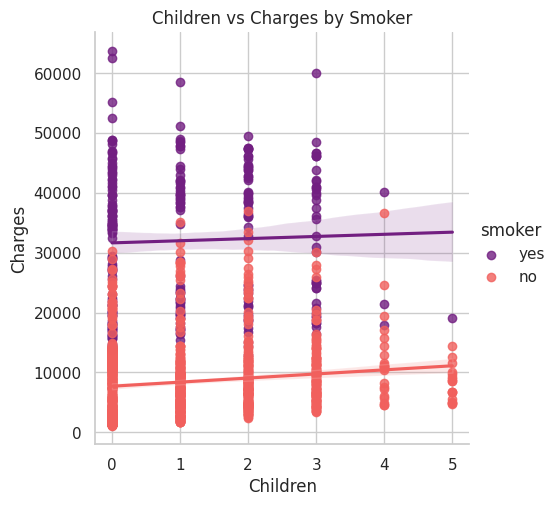

In [13]:
# Age vs Charges by Smoker
ax = sns.lmplot(x='age', y='charges', data=df, hue='smoker', palette='coolwarm')
plt.title('Age vs Charges by Smoker')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

# BMI vs Charges by Smoker
ax = sns.lmplot(x='bmi', y='charges', data=df, hue='smoker', palette='viridis')
plt.title('BMI vs Charges by Smoker')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

# Children vs Charges by Smoker
ax = sns.lmplot(x='children', y='charges', data=df, hue='smoker', palette='magma')
plt.title('Children vs Charges by Smoker')
plt.xlabel('Children')
plt.ylabel('Charges')
plt.show()




In [14]:
##Converting objects labels into categorical
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

,0
age,int64
sex,category
bmi,float64
children,int64
smoker,category
region,category
charges,float64


In [15]:
##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

,0
age,int64
sex,int64
bmi,float64
children,int64
smoker,int64
region,int64
charges,float64


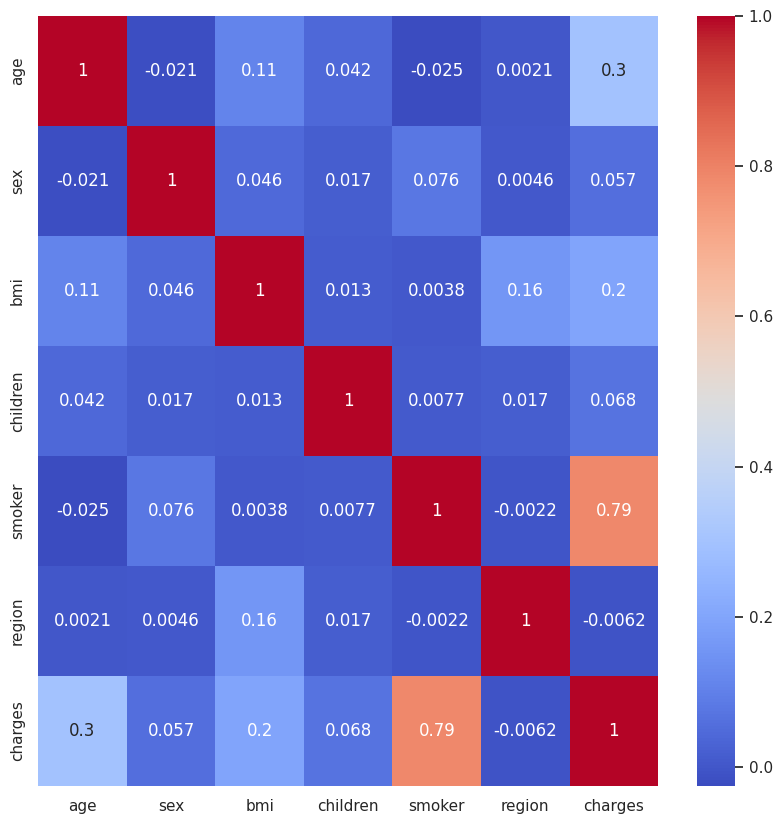

In [16]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

<font size=5><p style="color:purple"> Linear Regression

In [17]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Splitting data into features (x) and target (y)
x = df.drop(['charges'], axis=1)  # Features excluding the target 'charges'
y = df['charges']  # Target is the 'charges' column

# Train-test split (80% train, 20% test)
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)

# Initialize the Linear Regression model
Lin_reg = LinearRegression()

# Fit the model to the training data
Lin_reg.fit(x_train, y_train)

# Outputs: Intercept and coefficients of the regression model
print(f"Intercept: {Lin_reg.intercept_}")  # The intercept of the regression line
print(f"Coefficients: {Lin_reg.coef_}")  # Coefficients representing the impact of each feature

# Performance of the model on the test data (R² score)
print(f"R² score (Test Data): {Lin_reg.score(x_test, y_test):.3f}")  # Model's performance on test data


Intercept: -11661.98390882441
Coefficients: [  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]
R² score (Test Data): 0.800


<font size=5><p style="color:purple"> Random Forest Regressor

In [18]:
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn import metrics

# Features and target
x = df.drop(['charges'], axis=1)  # Features excluding the target 'charges'
y = df['charges']  # Target is the 'charges' column

# Initialize the RandomForestRegressor model
Rfr = rfr(n_estimators=100,
          criterion='squared_error',  # 'squared_error' is the default and equivalent to 'mse'
          random_state=1,
          n_jobs=-1)

# Fit the model on the training data
Rfr.fit(x_train, y_train)

# Predicting on training and test data
x_train_pred_rf = Rfr.predict(x_train)
x_test_pred_rf = Rfr.predict(x_test)

# Calculate R² and MSE for both train and test data
r2_train_rf = metrics.r2_score(y_train, x_train_pred_rf)
r2_test_rf = metrics.r2_score(y_test, x_test_pred_rf)

mse_train_rf = metrics.mean_squared_error(y_train, x_train_pred_rf)
mse_test_rf = metrics.mean_squared_error(y_test, x_test_pred_rf)

# Print the Random Forest model metrics
print("\nRandom Forest Regressor Model Metrics:")
print(f"Random Forest R² (Train Data): {r2_train_rf:.3f}")
print(f"Random Forest MSE (Train Data): {mse_train_rf:.3f}")
print(f"Random Forest R² (Test Data): {r2_test_rf:.3f}")
print(f"Random Forest MSE (Test Data): {mse_test_rf:.3f}")



Random Forest Regressor Model Metrics:
Random Forest R² (Train Data): 0.975
Random Forest MSE (Train Data): 3628893.887
Random Forest R² (Test Data): 0.876
Random Forest MSE (Test Data): 19730453.910


<font size=5><p style="color:purple"> Decision Tree Regressor

In [19]:
from sklearn.tree import DecisionTreeRegressor  # Import DecisionTreeRegressor
from sklearn import metrics

# Features and target
x = df.drop(['charges'], axis=1)  # Features excluding the target 'charges'
y = df['charges']  # Target is the 'charges' column

# Train-test split (80% train, 20% test)
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)

# Initialize the DecisionTreeRegressor model
Dtr = DecisionTreeRegressor(criterion='squared_error',  # 'squared_error' is the default
                             random_state=1)

# Fit the model on the training data
Dtr.fit(x_train, y_train)

# Predicting on training and test data
x_train_pred_dt = Dtr.predict(x_train)
x_test_pred_dt = Dtr.predict(x_test)

# Calculate R² and MSE for both train and test data
r2_train_dt = metrics.r2_score(y_train, x_train_pred_dt)
r2_test_dt = metrics.r2_score(y_test, x_test_pred_dt)

mse_train_dt = metrics.mean_squared_error(y_train, x_train_pred_dt)
mse_test_dt = metrics.mean_squared_error(y_test, x_test_pred_dt)

# Print the Decision Tree model metrics
print("\nDecision Tree Regressor Model Metrics:")
print(f"Decision Tree R² (Train Data): {r2_train_dt:.3f}")
print(f"Decision Tree MSE (Train Data): {mse_train_dt:.3f}")
print(f"Decision Tree R² (Test Data): {r2_test_dt:.3f}")
print(f"Decision Tree MSE (Test Data): {mse_test_dt:.3f}")



Decision Tree Regressor Model Metrics:
Decision Tree R² (Train Data): 0.998
Decision Tree MSE (Train Data): 244239.554
Decision Tree R² (Test Data): 0.635
Decision Tree MSE (Test Data): 58050762.340


<font size=5><p style="color:purple"> Comparing models

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Initialize models
lin_reg = LinearRegression()
rfr = RandomForestRegressor(n_estimators=100, criterion='squared_error', random_state=1, n_jobs=-1)
dt_reg = DecisionTreeRegressor(random_state=1)

# Fit models to the training data
lin_reg.fit(x_train, y_train)
rfr.fit(x_train, y_train)
dt_reg.fit(x_train, y_train)

# Make predictions on test data
y_pred_lin_reg = lin_reg.predict(x_test)
y_pred_rfr = rfr.predict(x_test)
y_pred_dt_reg = dt_reg.predict(x_test)

# Calculate R² and MSE for each model
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)
r2_rfr = r2_score(y_test, y_pred_rfr)
r2_dt_reg = r2_score(y_test, y_pred_dt_reg)

mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
mse_dt_reg = mean_squared_error(y_test, y_pred_dt_reg)

# Comparing models based on R²
if r2_rfr > r2_lin_reg and r2_rfr > r2_dt_reg:
    print("\nThe Random Forest Regressor model performs best on the test data based on R² score.")
elif r2_lin_reg > r2_rfr and r2_lin_reg > r2_dt_reg:
    print("\nThe Linear Regression model performs best on the test data based on R² score.")
else:
    print("\nThe Decision Tree model performs best on the test data based on R² score.")

# Comparing models based on MSE
if mse_rfr < mse_lin_reg and mse_rfr < mse_dt_reg:
    print("\nThe Random Forest Regressor model has the lowest MSE on the test data, indicating better prediction accuracy.")
elif mse_lin_reg < mse_rfr and mse_lin_reg < mse_dt_reg:
    print("\nThe Linear Regression model has the lowest MSE on the test data, indicating better prediction accuracy.")
else:
    print("\nThe Decision Tree model has the lowest MSE on the test data, indicating better prediction accuracy.")



The Random Forest Regressor model performs best on the test data based on R² score.

The Random Forest Regressor model has the lowest MSE on the test data, indicating better prediction accuracy.


<font size=5><p style="color:purple"> Saving model with the least loss

In [21]:
import pickle  # For saving the model

# Calculate MSE for all models (already trained: Lin_reg, Rfr, Dtr)
mse_test_lr = metrics.mean_squared_error(y_test, Lin_reg.predict(x_test))  # Linear Regression
mse_test_rf = metrics.mean_squared_error(y_test, Rfr.predict(x_test))  # Random Forest
mse_test_dt = metrics.mean_squared_error(y_test, Dtr.predict(x_test))  # Decision Tree

# Print MSE values
print(f"Linear Regression MSE (Test Data): {mse_test_lr:.3f}")
print(f"Random Forest MSE (Test Data): {mse_test_rf:.3f}")
print(f"Decision Tree MSE (Test Data): {mse_test_dt:.3f}")

# Identifying  the model with the least MSE (best performance)
if min(mse_test_lr, mse_test_rf, mse_test_dt) == mse_test_lr:
    best_model = Lin_reg
    print("Linear Regression has the least MSE, saving the model.")
elif min(mse_test_lr, mse_test_rf, mse_test_dt) == mse_test_rf:
    best_model = Rfr
    print("Random Forest has the least MSE, saving the model.")
else:
    best_model = Dtr
    print("Decision Tree has the least MSE, saving the model.")

# Saving the best model using pickle
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("Model saved successfully!")


Linear Regression MSE (Test Data): 31845929.134
Random Forest MSE (Test Data): 19730453.910
Decision Tree MSE (Test Data): 58050762.340
Random Forest has the least MSE, saving the model.
Model saved successfully!


<font size=5><p style="color:purple"> Predicting one row of the test data

In [22]:
# Predicting charges for one row of test data
single_row = x_test.iloc[0:1]  # Taking the first row (1D DataFrame)

#Predicting using the best model- Random Forest Regressor model
predicted_charge = rfr.predict(single_row)

# Displaying  the predicted charge
print(f"Predicted charge for the first row in test data: {predicted_charge[0]:.2f}")


Predicted charge for the first row in test data: 12293.43


<font size=5><p style="color:purple"> Visualizing Trained Model : Random Forest

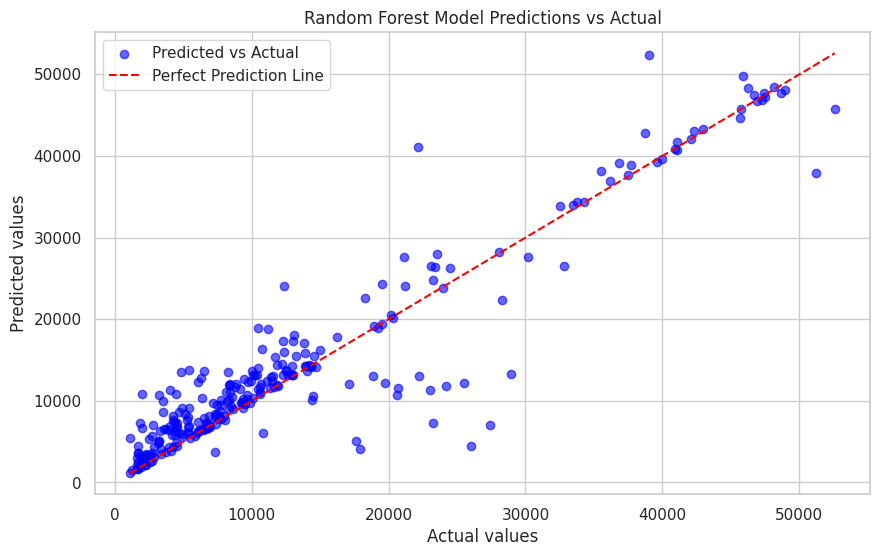

In [23]:
# Visualizing the Random Forest model predictions

# Getting  predictions from the best model (Random Forest)
y_pred_rf = best_model.predict(x_test)

# Scatter plot to visualize the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', label='Predicted vs Actual', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.title('Random Forest Model Predictions vs Actual')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.show()